In [116]:
import csv
from ntpath import join
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


url='https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-06-29/animal_rescues.csv'
df=pd.read_csv(url)

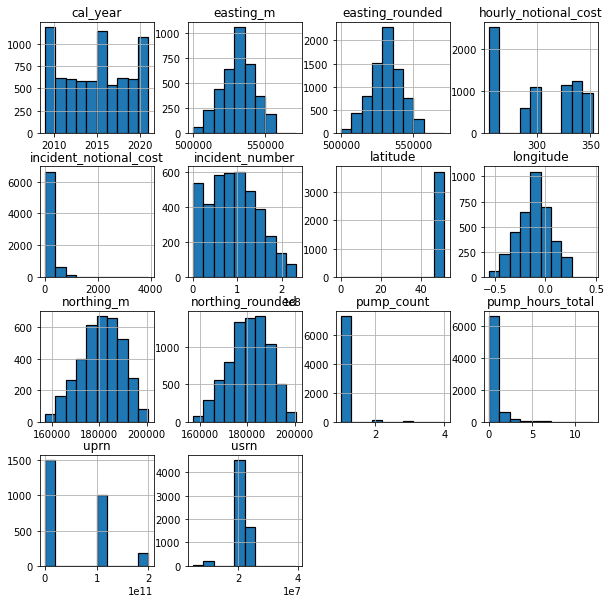

In [115]:
df.hist(edgecolor='black', linewidth=1.2, figsize=(10, 10))
plt.show()

In [63]:
df.columns

Index(['incident_number', 'date_time_of_call', 'cal_year', 'fin_year',
       'type_of_incident', 'pump_count', 'pump_hours_total',
       'hourly_notional_cost', 'incident_notional_cost', 'final_description',
       'animal_group_parent', 'originof_call', 'property_type',
       'property_category', 'special_service_type_category',
       'special_service_type', 'ward_code', 'ward', 'borough_code', 'borough',
       'stn_ground_name', 'uprn', 'street', 'usrn', 'postcode_district',
       'easting_m', 'northing_m', 'easting_rounded', 'northing_rounded',
       'latitude', 'longitude'],
      dtype='object')

In [64]:
df['pump_count'].head(30)

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    2.0
27    1.0
28    1.0
29    1.0
Name: pump_count, dtype: float64

([<matplotlib.axis.XTick at 0x7fa257e76760>,
 <a list of 6 Text major ticklabel objects>)

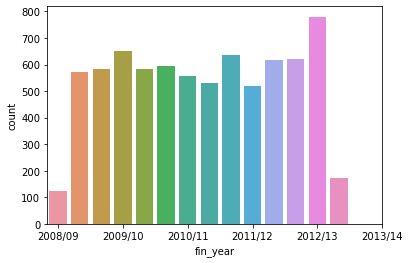

In [65]:
ax = sns.countplot(x="fin_year", data=df)
plt.xticks(range(0, 16, 3))

[Text(0, 0, '2008/09'), Text(0, 0, '2009/10'), Text(0, 0, '2010/11')]


[Text(0, 0, '2008/09'),
 Text(0, 0, ' '),
 Text(0, 0, '2010/11'),
 Text(0, 0, ' '),
 Text(0, 0, '2012/13'),
 Text(0, 0, ' '),
 Text(0, 0, '2014/15'),
 Text(0, 0, ' '),
 Text(0, 0, '2016/17'),
 Text(0, 0, ' '),
 Text(0, 0, '2018/19'),
 Text(0, 0, ' '),
 Text(0, 0, '2020/21')]

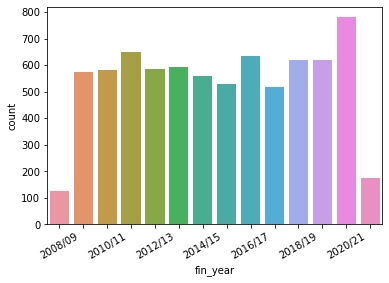

In [66]:
chart = sns.countplot(
    x="fin_year", data=df,
)
labels = chart.get_xticklabels()
print(labels[0:3])
labels = labels[::2]

def intersperse(lst, item):
    result = [item] * (len(lst) * 2 - 1)
    result[0::2] = lst
    return result

labels = intersperse(labels, " ")
chart.set_xticklabels(labels, rotation=30)

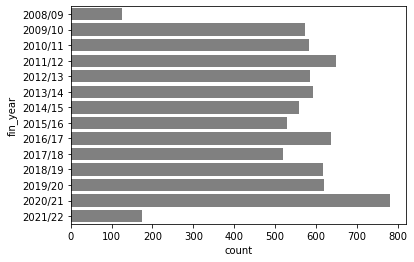

In [67]:
ax = sns.countplot(y="fin_year", data=df, color='grey') # Note: Look up Hue

In [68]:
df.columns
# df.head() -> type of animal -> time of day call came in and also incident_notional_cost (appr. cost)

Index(['incident_number', 'date_time_of_call', 'cal_year', 'fin_year',
       'type_of_incident', 'pump_count', 'pump_hours_total',
       'hourly_notional_cost', 'incident_notional_cost', 'final_description',
       'animal_group_parent', 'originof_call', 'property_type',
       'property_category', 'special_service_type_category',
       'special_service_type', 'ward_code', 'ward', 'borough_code', 'borough',
       'stn_ground_name', 'uprn', 'street', 'usrn', 'postcode_district',
       'easting_m', 'northing_m', 'easting_rounded', 'northing_rounded',
       'latitude', 'longitude'],
      dtype='object')

In [69]:
fig = px.scatter_geo(df,
                    lon = df['longitude'],
                    lat = df['latitude'],
                    opacity = 0.1,
                    hover_name = 'animal_group_parent',
                    size = 'hourly_notional_cost'
                    )
fig.show()

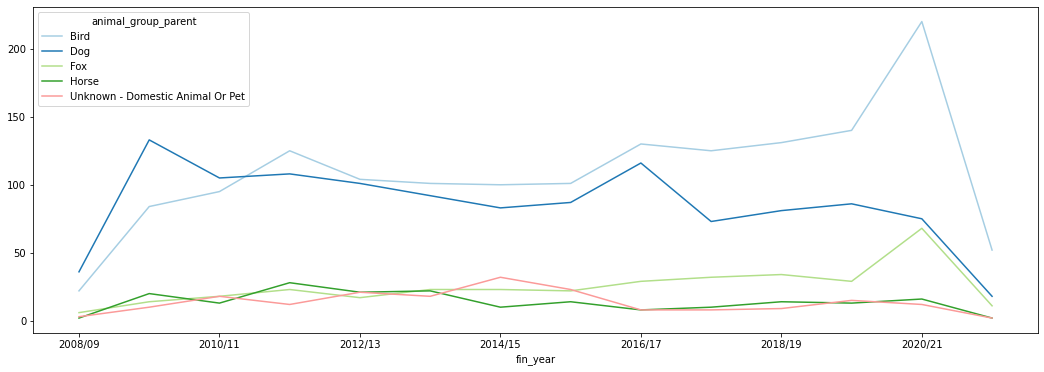

In [70]:
top_groups5=df[df['animal_group_parent'].isin(df['animal_group_parent'].value_counts()[1:6].index)]
pd.crosstab(top_groups5['fin_year'],top_groups5['animal_group_parent']).plot(color=sns.color_palette('Paired',5))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

In [71]:
# Bird higher pandemic -> home more... bored more bird observations
# df.index(df['latitude']==0).tolist()
df.index[df['latitude'] == 0].tolist()


[7028]

In [72]:

df2 = df.drop(labels=7028, axis=0)

fig2 = px.scatter_geo(df2,
                    lon = df2['longitude'],
                    lat = df2['latitude'],
                    opacity = 0.1,
                    hover_name = 'animal_group_parent',
                    color = 'animal_group_parent'
                    )
fig2.update_geos(visible=True, resolution=50,
                fitbounds='locations')
fig2.show()

In [73]:
domestic = {'Dog', 'Horse','Rabbit','Unknown - Domestic Animal Or Pet', 'Cat', 'Unknown - Hevy Livestock Animal', 'cat', 'Hamster'}
df3 = df2
df3['domestic'] = False
for row, i in df3.iterrows():
    an = df3['animal_group_parent']
    print(an)

    if (an == "Dog"):
        df3['domestic'][i] = True

0          Dog
1          Fox
2          Dog
3        Horse
4       Rabbit
         ...  
7539       Cat
7540       Cat
7541      Bird
7542      Bird
7543      Bird
Name: animal_group_parent, Length: 7543, dtype: object


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [98]:
conditions = [
    (df3['animal_group_parent'] == "Dog"),
    (df3['animal_group_parent'] == "Horse"),
    (df3['animal_group_parent'] == "Rabbit"),
    (df3['animal_group_parent'] == "Unknown - Domestic Animal Or Pet"),
    (df3['animal_group_parent'] == "Cat"),
    (df3['animal_group_parent'] == "Unknown - Heavy Livestock Animal"),
    (df3['animal_group_parent'] == "cat"),
    (df3['animal_group_parent'] == "Hamster"),
    (df3['animal_group_parent'] == "Cow"),
    (df3['animal_group_parent'] == "Unknown - Animal rescue from water - Farm animal"),
    (df3['animal_group_parent'] == "Unknown - Animal rescue from below ground - Farm animal"),
    (df3['animal_group_parent'] == "Fox"),
    (df3['animal_group_parent'] == "Squirrel"),
    (df3['animal_group_parent'] == "Bird"),
    (df3['animal_group_parent'] == "Sheep"),
    (df3['animal_group_parent'] == "Deer"),
    (df3['animal_group_parent'] == "Unknown - Wild Animal"),
    (df3['animal_group_parent'] == "Snake"),
    (df3['animal_group_parent'] == "Lizard"),
    (df3['animal_group_parent'] == "Hedgehog"),
    (df3['animal_group_parent'] == "Lamb"),
    (df3['animal_group_parent'] == "Fish"),
    (df3['animal_group_parent'] == "Bull"),
    (df3['animal_group_parent'] == "Ferret"),
    (df3['animal_group_parent'] == "Budgie"),
    (df3['animal_group_parent'] == "Pigeon"),
    (df3['animal_group_parent'] == "Goat"),
    (df3['animal_group_parent'] == "Tortoise"),
]

values = [False, True, False, False, False, True, False, False, True, True, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False]
df3['large_animal'] = np.select(conditions, values)
df3.head()

,incident_number,date_time_of_call,cal_year,fin_year,type_of_incident,pump_count,pump_hours_total,hourly_notional_cost,incident_notional_cost,final_description,...,usrn,postcode_district,easting_m,northing_m,easting_rounded,northing_rounded,latitude,longitude,domestic,large_animal
0,139091.0,01/01/2009 03:01,2009,2008/09,Special Service,1.0,2.0,255,510.0,Redacted,...,20500146.0,SE19,NaN,NaN,532350,170050,NaN,NaN,False,0
1,275091.0,01/01/2009 08:51,2009,2008/09,Special Service,1.0,1.0,255,255.0,Redacted,...,NaN,SE25,534785.0,167546.0,534750,167550,51.390954,-0.064167,False,0
2,2075091.0,04/01/2009 10:07,2009,2008/09,Special Service,1.0,1.0,255,255.0,Redacted,...,NaN,SM5,528041.0,164923.0,528050,164950,51.368941,-0.161985,False,0
3,2872091.0,05/01/2009 12:27,2009,2008/09,Special Service,1.0,1.0,255,255.0,Redacted,...,21401484.0,UB9,504689.0,190685.0,504650,190650,51.605283,-0.489684,False,1
4,3553091.0,06/01/2009 15:23,2009,2008/09,Special Service,1.0,1.0,255,255.0,Redacted,...,21300122.0,RM3,NaN,NaN,554650,192350,NaN,NaN,False,0


In [123]:
fig3 = px.scatter_geo(df3,
                    lon = df3['longitude'],
                    lat = df3['latitude'],
                    opacity = 0.2,
                    hover_name = 'animal_group_parent',
                    color = 'large_animal',
                    color_continuous_scale=["gray","red"]
                    )
fig3.update_geos(visible=True, resolution=50,
                fitbounds='locations')
fig3.show()

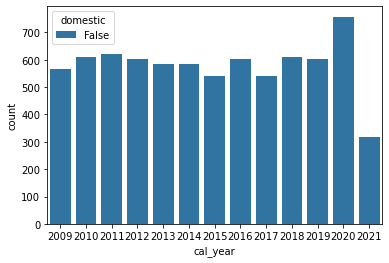

In [102]:
ax = sns.countplot(x="cal_year", data=df3, hue="domestic")

In [84]:
df3['animal_group_parent']=='Bird'

0       False
1       False
2       False
3       False
4       False
        ...  
7539    False
7540    False
7541     True
7542     True
7543     True
Name: animal_group_parent, Length: 7543, dtype: bool

In [87]:
df4 = df3[(df3['animal_group_parent']=="Bird")].reset_index()

In [88]:
df4

,index,incident_number,date_time_of_call,cal_year,fin_year,type_of_incident,pump_count,pump_hours_total,hourly_notional_cost,incident_notional_cost,...,street,usrn,postcode_district,easting_m,northing_m,easting_rounded,northing_rounded,latitude,longitude,domestic
0,11,5363091.0,08/01/2009 19:23,2009,2008/09,Special Service,1.0,2.0,255,510.0,...,Battersea Park,NaN,SW11,528666.0,177290.0,528650,177250,51.479943,-0.148526,False
1,27,7051091.0,11/01/2009 12:32,2009,2008/09,Special Service,1.0,1.0,255,255.0,...,Albany Road,21300936.0,RM12,552339.0,186735.0,552350,186750,51.558931,0.196209,False
2,31,9252091.0,15/01/2009 12:38,2009,2008/09,Special Service,1.0,1.0,255,255.0,...,Deeley Road,NaN,SW8,529741.0,176685.0,529750,176650,51.474260,-0.133276,False
3,40,13245091.0,22/01/2009 21:35,2009,2008/09,Special Service,1.0,1.0,255,255.0,...,Broomgrove Gardens,21202323.0,HA8,NaN,NaN,519350,190750,NaN,NaN,False
4,63,21760091.0,07/02/2009 11:12,2009,2008/09,Special Service,1.0,1.0,255,255.0,...,Lisle Street,NaN,WC2H,529769.0,180812.0,529750,180850,51.511343,-0.131357,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1524,7528,NaN,28/05/2021 13:07,2021,2021/22,Special Service,1.0,1.0,352,352.0,...,GREYHOUND LANE,21900642.0,SW16,NaN,NaN,529950,170550,NaN,NaN,False
1525,7535,NaN,30/05/2021 12:58,2021,2021/22,Special Service,1.0,1.0,352,352.0,...,ELMWOOD ROAD,22500904.0,SE24,532696.0,174764.0,532650,174750,51.456315,-0.091464,False
1526,7541,NaN,31/05/2021 15:47,2021,2021/22,Special Service,1.0,1.0,352,352.0,...,ADDISON BRIDGE PLACE,21000028.0,W14,NaN,NaN,524550,178950,NaN,NaN,False
1527,7542,NaN,31/05/2021 18:20,2021,2021/22,Special Service,1.0,1.0,352,352.0,...,GREENFORD ROAD,20602353.0,UB6,NaN,NaN,514950,183550,NaN,NaN,False


In [89]:
df4.head()

,index,incident_number,date_time_of_call,cal_year,fin_year,type_of_incident,pump_count,pump_hours_total,hourly_notional_cost,incident_notional_cost,...,street,usrn,postcode_district,easting_m,northing_m,easting_rounded,northing_rounded,latitude,longitude,domestic
0,11,5363091.0,08/01/2009 19:23,2009,2008/09,Special Service,1.0,2.0,255,510.0,...,Battersea Park,NaN,SW11,528666.0,177290.0,528650,177250,51.479943,-0.148526,False
1,27,7051091.0,11/01/2009 12:32,2009,2008/09,Special Service,1.0,1.0,255,255.0,...,Albany Road,21300936.0,RM12,552339.0,186735.0,552350,186750,51.558931,0.196209,False
2,31,9252091.0,15/01/2009 12:38,2009,2008/09,Special Service,1.0,1.0,255,255.0,...,Deeley Road,NaN,SW8,529741.0,176685.0,529750,176650,51.474260,-0.133276,False
3,40,13245091.0,22/01/2009 21:35,2009,2008/09,Special Service,1.0,1.0,255,255.0,...,Broomgrove Gardens,21202323.0,HA8,NaN,NaN,519350,190750,NaN,NaN,False
4,63,21760091.0,07/02/2009 11:12,2009,2008/09,Special Service,1.0,1.0,255,255.0,...,Lisle Street,NaN,WC2H,529769.0,180812.0,529750,180850,51.511343,-0.131357,False


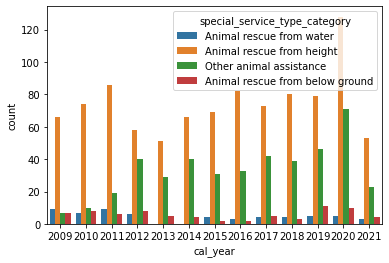

In [90]:
ax2 = sns.countplot(x="cal_year", data=df4, hue="special_service_type_category")

Other factors to narrow data down -> property_type, rescue type, special_service_type, 

special_service_type -> gives a lot of info, can look at one specific type of animal rescue

duration of incident -> pump hours total
Cost -> incident_notional_cost

There are a couple of null values for latitude/longitude, should mention if showing geographic plotting

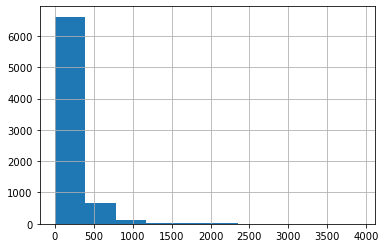

In [91]:
df3['incident_notional_cost'].hist()
# plt.scatter(data=df3, x="cal_year", y="incident_notional_cost")
df_high = df3[df3['incident_notional_cost']>2500]

In [ ]:
df_high.head(10)

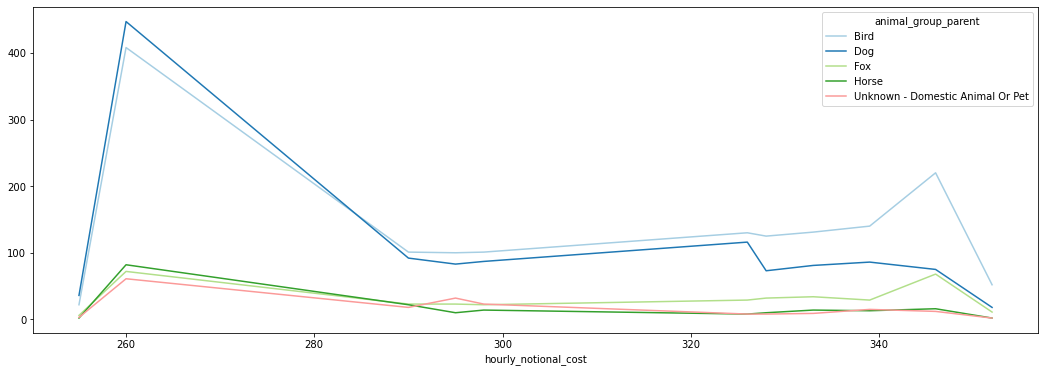

In [75]:
top_groups5=df[df['animal_group_parent'].isin(df['animal_group_parent'].value_counts()[1:6].index)]
pd.crosstab(top_groups5['hourly_notional_cost'],top_groups5['animal_group_parent']).plot(color=sns.color_palette('Paired',5))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

In [76]:
df_long = df3[df3['pump_hours_total']>7]
# (df3['pump_hours_total']>7).sum()
df_long.head(10)

,incident_number,date_time_of_call,cal_year,fin_year,type_of_incident,pump_count,pump_hours_total,hourly_notional_cost,incident_notional_cost,final_description,...,street,usrn,postcode_district,easting_m,northing_m,easting_rounded,northing_rounded,latitude,longitude,domestic
874,100611101.0,26/06/2010 15:29,2010,2010/11,Special Service,3.0,8.0,260,2080.0,CAT TRAPPED IN BIN CHUTE,...,Sixth Avenue,NaN,W10,NaN,NaN,524050,182650,NaN,NaN,False
1289,49189111.0,06/04/2011 02:03,2011,2011/12,Special Service,3.0,9.0,260,2340.0,Redacted,...,Sandpiper Close,NaN,E17,535938.0,191035.0,535950,191050,51.601758,-0.038566,False
1407,82423111.0,27/05/2011 06:50,2011,2011/12,Special Service,3.0,9.0,260,2340.0,Redacted,...,Sandpiper Close,NaN,E17,535940.0,191003.0,535950,191050,51.601470,-0.038549,False
1477,101755111.0,29/06/2011 21:04,2011,2011/12,Special Service,3.0,9.0,260,2340.0,Redacted,...,Thomas Road,NaN,E14,537117.0,181441.0,537150,181450,51.515261,-0.025289,False
2542,48360131.0,19/04/2013 07:01,2013,2013/14,Special Service,2.0,12.0,290,3480.0,FOAL IN RIVER WATER LEVEL ONE IMPLEMENTED,...,Lower Hall Lane,NaN,E4,536288.0,192441.0,536250,192450,51.614308,-0.032969,False
3143,49076141.0,22/04/2014 09:54,2014,2014/15,Special Service,2.0,9.0,295,2655.0,KITTEN TRAPPED IN CHIMNEY,...,Salisbury Road,21500996.0,TW4,NaN,NaN,511450,175750,NaN,NaN,False
3757,62700151.0,22/05/2015 11:34,2015,2015/16,Special Service,2.0,10.0,298,2980.0,HORSE FALLEN INTO SWIMMING POOL,...,Cudham Lane South,20302994.0,TN14,544910.0,158822.0,544950,158850,51.310069,0.077708,False
4450,NaN,28/07/2016 13:49,2016,2016/17,Special Service,3.0,12.0,326,3912.0,CAT STUCK WITHIN WALL SPACE RSPCA IN ATTENDANCE,...,SPRING PLACE,20400353.0,NW5,NaN,NaN,528550,185050,NaN,NaN,False
5569,NaN,09/07/2018 08:35,2018,2018/19,Special Service,2.0,8.0,333,2664.0,HORSE TRAPPED IN DOORWAY ADDITIONAL FRU REQUES...,...,MEAD HOUSE LANE,21401259.0,UB4,508932.0,182202.0,508950,182250,51.528240,-0.431063,False
7139,NaN,15/11/2020 13:47,2020,2020/21,Special Service,2.0,8.0,346,2768.0,Redacted,...,CHURCH MANORWAY,20100314.0,DA8,550614.0,179656.0,550650,179650,51.495792,0.168325,False


In [77]:
df['special_service_type'].unique()

array(['Animal assistance involving livestock - Other action',
       'Animal rescue from below ground - Domestic pet',
       'Animal rescue from water - Farm animal',
       'Animal rescue from water - Domestic pet',
       'Wild animal rescue from height',
       'Animal rescue from height - Domestic pet',
       'Animal rescue from water - Bird',
       'Animal rescue from height - Bird',
       'Wild animal rescue from water or mud',
       'Animal assistance - Lift heavy livestock animal',
       'Wild animal rescue from below ground',
       'Animal rescue from below ground - Bird',
       'Animal rescue from height - Farm animal',
       'Animal rescue from below ground - Farm animal',
       'Assist trapped domestic animal',
       'Animal harm involving domestic animal',
       'Animal assistance involving wild animal - Other action',
       'Animal assistance involving domestic animal - Other action',
       'Animal harm involving wild animal',
       'Assist  trapped livest

Interesting df['special_service_type'] values:
   - Animal harm involving livestock
   - Animal harm involving wild animal
   - Animal harm involving domestic animal

In [78]:
df6 = df3[(df3["special_service_type"] == 'Animal harm involving livestock') | (df3["special_service_type"] == 'Animal harm involving domestic animal') | (df3["special_service_type"] == 'Animal harm involving wild animal')]


In [79]:
df6.columns

Index(['incident_number', 'date_time_of_call', 'cal_year', 'fin_year',
       'type_of_incident', 'pump_count', 'pump_hours_total',
       'hourly_notional_cost', 'incident_notional_cost', 'final_description',
       'animal_group_parent', 'originof_call', 'property_type',
       'property_category', 'special_service_type_category',
       'special_service_type', 'ward_code', 'ward', 'borough_code', 'borough',
       'stn_ground_name', 'uprn', 'street', 'usrn', 'postcode_district',
       'easting_m', 'northing_m', 'easting_rounded', 'northing_rounded',
       'latitude', 'longitude', 'domestic'],
      dtype='object')

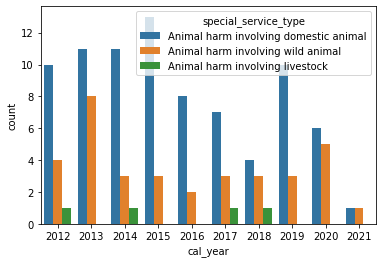

In [80]:
ax3 = sns.countplot(x="cal_year", data=df6, hue="special_service_type")

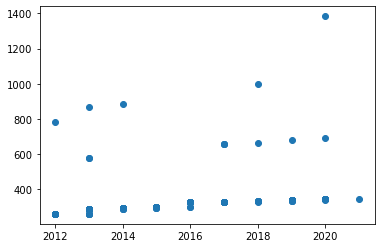

In [81]:
plt.scatter(x=df6["cal_year"], y=df6['incident_notional_cost'])

In [ ]:
df6.hist()

In [93]:

# df2 = df.drop(labels=7028, axis=0)

fig3 = px.scatter_geo(df4,
                    lon = df4['longitude'],
                    lat = df4['latitude'],
                    opacity = 0.23,
                    )
fig3.update_geos(visible=True, resolution=50,
                fitbounds='locations')
fig3.show()